In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("WindSpeed.csv")
data["date"] = pd.to_datetime(data["date"], format="%m/%d/%Y")
print(data)
print(data.columns)


     station       date  18  21  00  03  06  09  12  15
0     Astana 2005-01-01   4   5   5   6   4   5   4   3
1     Astana 2005-01-02   2   0   1   3   5   8   6   5
2     Astana 2005-01-03   5   4   4   4   4   4   3   4
3     Astana 2005-01-04   4   2   3   2   3   3   2   1
4     Astana 2005-01-05   1   1   1   1   1   1   0   2
...      ...        ...  ..  ..  ..  ..  ..  ..  ..  ..
6658  Astana 2023-04-26   1   1   2   1   4   3   2   1
6659  Astana 2023-04-27   0   0   0   1   1   1   1   0
6660  Astana 2023-04-28   0   0   1   1   2   2   2   2
6661  Astana 2023-04-29   1   1   0   2   2   3   2   1
6662  Astana 2023-04-30   2   1   1   2   2   3   2   1

[6663 rows x 10 columns]
Index(['station', 'date', '18', '21', '00', '03', '06', '09', '12', '15'], dtype='object')


Starting from a classic boundary test. Evaluating critical points by sorting min-maxes from the dataset in period of 2005-2022.
It is important to exclude non-zero minimum values if possible to test comparable boundaries.

Начнем с классического рубежного теста. Оценка критических точек путем сортировки мин-максимумов из набора данных за период 2005-2022 гг.
Для тестирования сравнимых границ важно по возможности исключать ненулевые минимальные значения.

In [93]:
data["year"] = data["date"].dt.year
max_wind_speed_per_year = data.groupby("year").max().iloc[:, 2:].max(axis=1)
min_wind_speed_per_year = data.groupby("year").min().iloc[:, 2:].min(axis=1)

print(max_wind_speed_per_year)

# then exclude zeros
for year in range(2005, 2023):
    if min_wind_speed_per_year.loc[year] == 0:
        min_wind_speed_per_year.loc[year] = data[data["year"] == year].nlargest(
            2, columns=data.columns[2:]).iloc[1, 2:].min()
print(min_wind_speed_per_year)


year
2005    15
2006    12
2007    18
2008    16
2009    16
2010    13
2011    11
2012    11
2013    15
2014    12
2015    15
2016    14
2017    15
2018    10
2019     7
2020    12
2021     8
2022     8
2023     8
dtype: int64
year
2005    3
2006    4
2007    1
2008    8
2009    3
2010    4
2011    1
2012    4
2013    4
2014    2
2015    3
2016    4
2017    4
2018    2
2019    0
2020    7
2021    1
2022    2
2023    0
dtype: int64


In [94]:
def plot_max_min_wind_speeds(max_speeds, min_speeds):
    years = max_speeds.index
    plt.figure(figsize=(12, 6))
    plt.plot(years, max_speeds, label="Maximum Wind Speed",
             color='b', marker='o')
    plt.plot(years, min_speeds, label="Minimum Wind Speed",
             color='r', marker='o')
    plt.xlabel("Year")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Maximum and Minimum Wind Speeds from 2005 to 2022")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

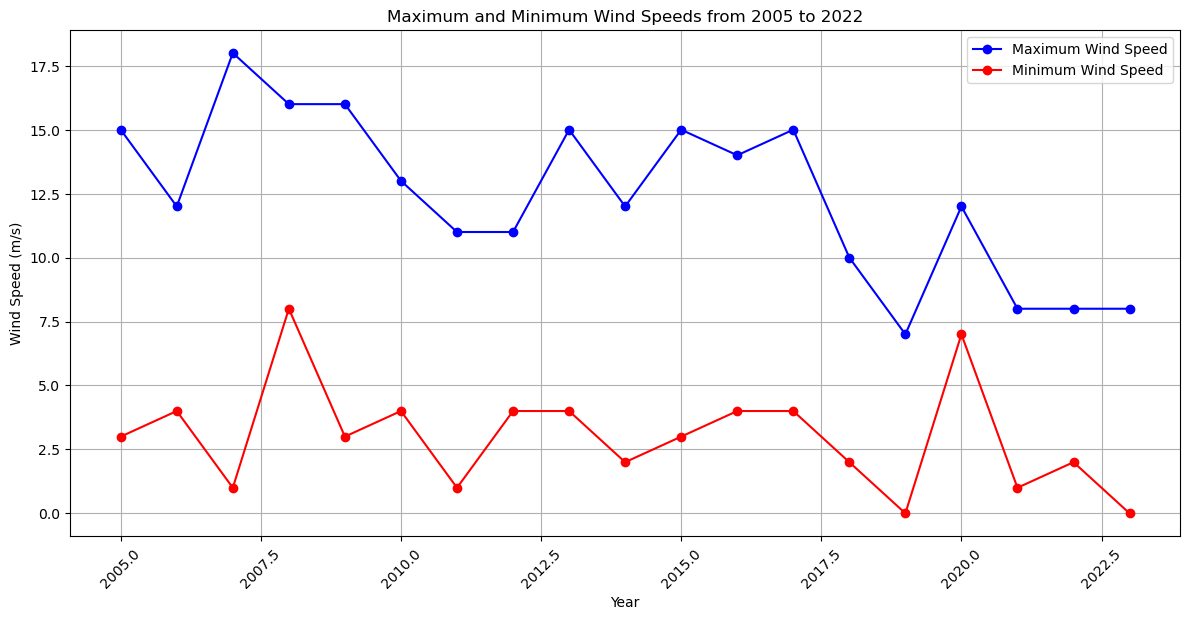

In [95]:
plot_max_min_wind_speeds(max_wind_speed_per_year, min_wind_speed_per_year)

There are several noticeable details, however one of them is the most distinguished from the line. Year 2020, the distinction between min-max values is less than 5 m/s, which is the only case in 2005-2022. This year, minimum non-zero wind speed and maximum wind speed deviation from average value appear to be comparatively small.

In code block below we will observe this year in more detail.

Есть несколько заметных деталей, однако одна из них наиболее выделяется из ряда. В 2020 году различие между минимальными и максимальными значениями составляет менее 5 м/с, что является единственным случаем в 2005-2022 годах. В этом году минимальное ненулевое значение скорости ветра и максимальное отклонение скорости ветра от среднего значения оказываются сравнительно небольшими.

В приведенном ниже кодовом блоке мы рассмотрим этот год более подробно.

In [96]:
data = pd.read_csv("WindSpeed.csv")
data["date"] = pd.to_datetime(data["date"], format="%m/%d/%Y")
print(data)
print(data.columns)

     station       date  18  21  00  03  06  09  12  15
0     Astana 2005-01-01   4   5   5   6   4   5   4   3
1     Astana 2005-01-02   2   0   1   3   5   8   6   5
2     Astana 2005-01-03   5   4   4   4   4   4   3   4
3     Astana 2005-01-04   4   2   3   2   3   3   2   1
4     Astana 2005-01-05   1   1   1   1   1   1   0   2
...      ...        ...  ..  ..  ..  ..  ..  ..  ..  ..
6658  Astana 2023-04-26   1   1   2   1   4   3   2   1
6659  Astana 2023-04-27   0   0   0   1   1   1   1   0
6660  Astana 2023-04-28   0   0   1   1   2   2   2   2
6661  Astana 2023-04-29   1   1   0   2   2   3   2   1
6662  Astana 2023-04-30   2   1   1   2   2   3   2   1

[6663 rows x 10 columns]
Index(['station', 'date', '18', '21', '00', '03', '06', '09', '12', '15'], dtype='object')


In [97]:
desired_year = 2020

In [98]:
data_year = data[data["date"].dt.year == desired_year]
def outliers_z_score_founder(desired_year):
    data_year["average_wind_speed"] = data_year.iloc[:, 2:].mean(axis=1)
    data_year["z_score"] = np.abs((data_year["average_wind_speed"] -
                              data_year["average_wind_speed"].mean()) / data_year["average_wind_speed"].std())
    outliers_z_score = data_year[data_year["z_score"] > z_score_threshold]
    return outliers_z_score

In [99]:
def outliers_IQR_founder(desired_year):
    data_year = data[data["date"].dt.year == desired_year]

    data_year["average_wind_speed"] = data_year.iloc[:, 2:].mean(axis=1)
    Q1 = data_year["average_wind_speed"].quantile(0.25)
    Q3 = data_year["average_wind_speed"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_IQR = data_year[(data_year["average_wind_speed"] < lower_bound) | (
        data_year["average_wind_speed"] > upper_bound)]
    return outliers_IQR

In [100]:
def plot_wind_speed_with_outliers(year_data, outliers_z, outliers_iqr):
    plt.figure(figsize=(12, 6))
    plt.plot(year_data["date"], year_data["average_wind_speed"],
             label="Average Wind Speed", color='b')
    plt.scatter(outliers_z["date"], outliers_z["average_wind_speed"],
                color='r', label="Outliers (Z-Score)")
    plt.scatter(outliers_iqr["date"], outliers_iqr["average_wind_speed"],
                color='g', label="Outliers (IQR)")
    plt.xlabel("Date")
    plt.ylabel("Average Wind Speed (m/s)")
    plt.title(f"Wind Speed Data for {desired_year} with Identified Outliers")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2504\3182265420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year["average_wind_speed"] = data_year.iloc[:, 2:].mean(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2504\3182265420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year["z_score"] = np.abs((data_year["average_wind_speed"] -
C:\Users\Admin\AppData\Local\Temp\ipykernel_2504\2176258757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

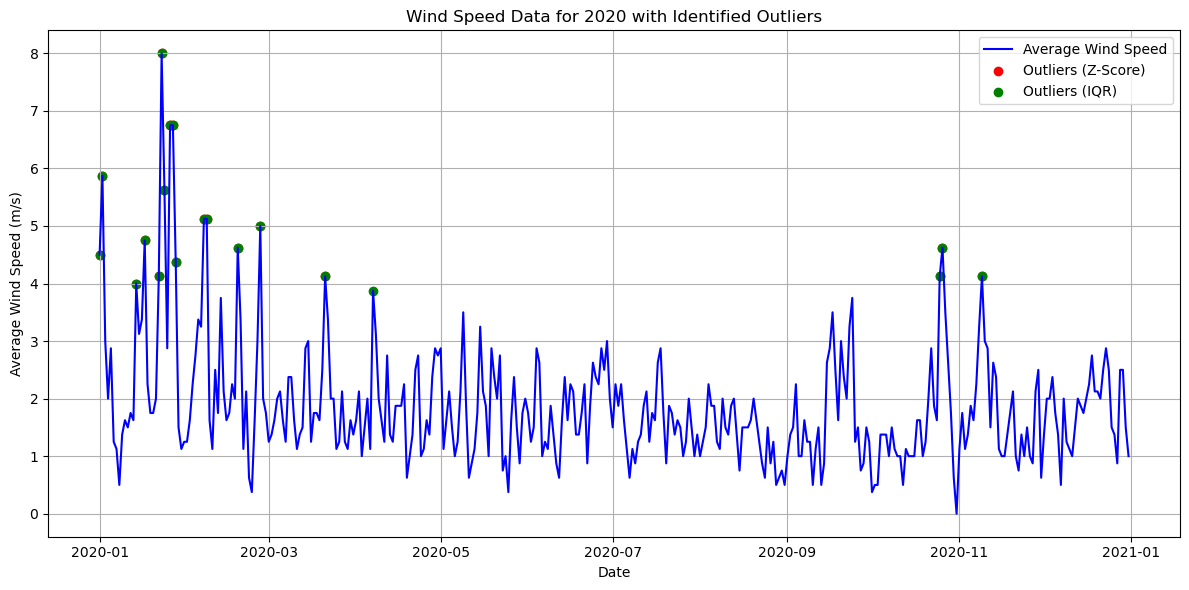

In [101]:
plot_wind_speed_with_outliers(data_year, outliers_z_score_founder(desired_year), outliers_IQR_founder(desired_year))

Here we observe that outliers were found only by IQR outlier method,since z-score-method performs findings of outliers on how far if point from average value. In 2020, we mentioned, all wind speed values are approximated to mean speeds.

Здесь мы видим, что исключения были найдены только методом IQR outlier, поскольку z-score-метод проводит поиск исключений по тому, насколько далеко они отстоят от среднего значения. В 2020 году, как мы уже отмечали, все значения скорости ветра аппроксимированы к средним значениям.

Now lets observe year, where the deviation between min-max values is the largest - year 2007 (refer to the first graph).

Теперь обратим внимание на год, в котором отклонение между min-max значениями наибольшее - 2007 год (см. первый график).

In [102]:
desired_year = 2007

In [103]:
data_year = data[data["date"].dt.year == desired_year]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2504\3182265420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year["average_wind_speed"] = data_year.iloc[:, 2:].mean(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2504\3182265420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year["z_score"] = np.abs((data_year["average_wind_speed"] -
C:\Users\Admin\AppData\Local\Temp\ipykernel_2504\2176258757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

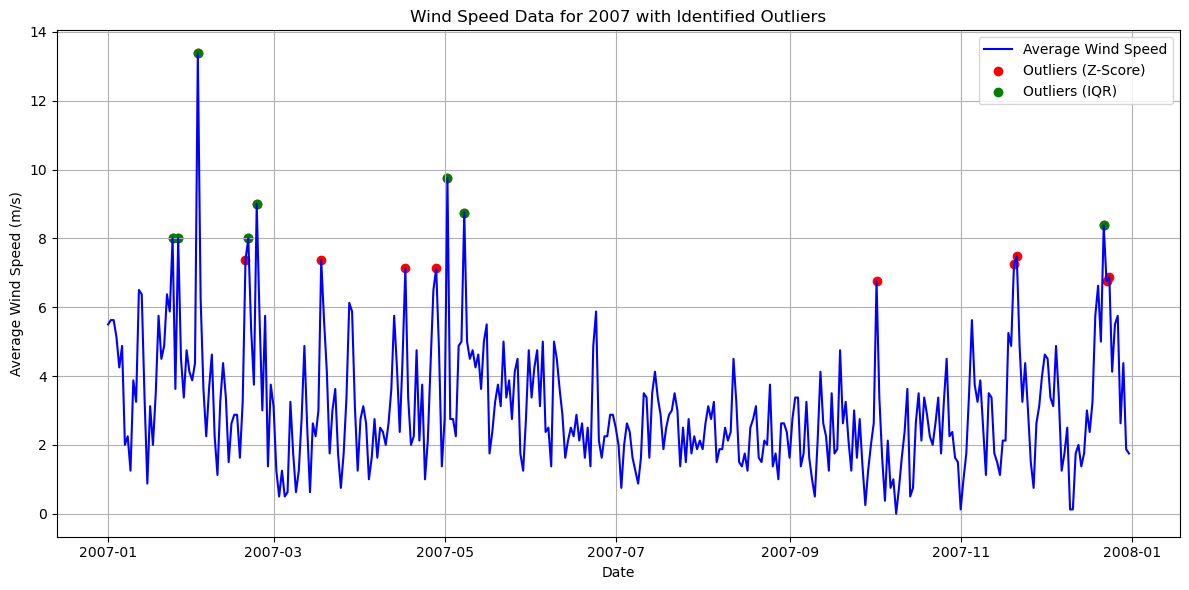

In [104]:
plot_wind_speed_with_outliers(data_year, outliers_z_score_founder(desired_year), outliers_IQR_founder(desired_year))


There we see equal number of outliers found by both z-score and IQR-method, which simply shows that there are more large deviation cases than in year 2020.
Здесь мы видим равное количество исключений, найденных как методом z-score, так и IQR-методом, что говорит о том, что случаев больших отклонений больше, чем в 2020 году.